In [5]:
import random
import numpy
import matplotlib.pyplot as plt
import copy
import numpy as np
import pylab as pl
%matplotlib inline

In [2]:
def prettyPicture(clf, X_test, y_test):
    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")

    plt.savefig("test.png")

In [3]:
import base64
import json
import subprocess

In [4]:
def output_image(name, format, bytes):
    image_start = "BEGIN_IMAGE_f9825uweof8jw9fj4r8"
    image_end = "END_IMAGE_0238jfw08fjsiufhw8frs"
    data = {}
    data['name'] = name
    data['format'] = format
    data['bytes'] = base64.encodestring(bytes)
    print image_start+json.dumps(data)+image_end

In [45]:
def ageNetWorthData():

    random.seed(42)
    numpy.random.seed(42)

    ages = []
    for ii in range(100):
        ages.append( random.randint(20,65) )
    net_worths = [ii * 6.25 + numpy.random.normal(scale=1.) for ii in ages]
### need massage list into a 2d numpy array to get it to work in LinearRegression
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    from sklearn.cross_validation import train_test_split
    ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths)

    return ages_train, ages_test, net_worths_train, net_worths_test

BEGIN_IMAGE_f9825uweof8jw9fj4r8{"bytes": "iVBORw0KGgoAAAANSUhEUgAAAbAAAAEgCAYAAADVKCZpAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz\nAAALEgAACxIB0t1+/AAAIABJREFUeJzt3Xtc1GX+///HIEjgEbDAD5mokYGRgJpZuZI5UG3qx1bN\ncj20lXv72Gfbn9pmbn5KtwjbVlut3F+7m50229haEzd1oAwrKzGVLZXMJFRIbFVEOXgAru8fI+OA\nWKIjM+/heb/d5ua8D/Oe63KY6zXX4X1dNmOMQURExGICvJ0AERGRc6EAJiIilqQAJiIilqQAJiIi\nlqQAJiIilqQAJiIilqQAJiIilqQAJiIilqQAJiIilqQAJiIilqQAJiIilqQAJiIilqQAJiIilqQA\nJiIilqQAJiIilqQAJiIilqQAJiIilqQAJiIilqQAJiIilqQAJiIilqQAJiIilqQAJiIilqQAJiIi\nluQTAayuro6kpCRGjBgBwNy5c7n00ktJTk4mOTmZ1atXu87NyMggNjaWuLg4srOzvZVkERHxskBv\nJwBg4cKF9OnTh8OHD7v2TZ8+nenTpzc4r6CggMzMTAoKCiguLmbYsGHs2LEDm83W0kkWEREv83oN\nrLi4mJUrV3Lvvfc22G+MOe3c5cuXM27cOAIDA4mJiSE2Npa8vLyWSqqIiPgQrwewadOm8fTTT59W\ni3ruuedITEzk3nvvpby8HICSkhK6devmOic6OpqSkpIWTa+IiPgGrwawd999l8jISBITExvUuKZO\nnUphYSH5+flERUUxY8YML6ZSRER8kVf7wNatW0dWVhYrV66kurqaI0eOMHHiRF599VXXOffddx/D\nhw8HnDWuPXv2uI4VFxcTHR3d5LXVLyYicm6a6sLxScZH5ObmmuHDhxtjjNm7d69r/4IFC8ydd95p\njDFm69atJjEx0Rw7dswUFh

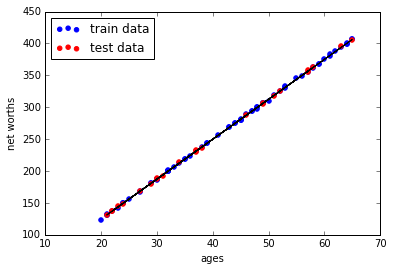

In [46]:
ages_train, ages_test, net_worths_train, net_worths_test = ageNetWorthData()



reg = studentReg(ages_train, net_worths_train)


plt.clf()
plt.scatter(ages_train, net_worths_train, color="b", label="train data")
plt.scatter(ages_test, net_worths_test, color="r", label="test data")
plt.plot(ages_test, reg.predict(ages_test), color="black")
plt.legend(loc=2)
plt.xlabel("ages")
plt.ylabel("net worths")


plt.savefig("test.png")
output_image("test.png", "png", open("test.png", "rb").read())

In [47]:
from sklearn.linear_model import LinearRegression

def studentReg(ages_train, net_worths_train):
    ### import the sklearn regression module, create, and train your regression
    ### name your regression reg
    
    ### your code goes here!
    reg = LinearRegression()
    reg.fit(ages_train, net_worths_train)
    
    return reg

## Extracting information from Sklearn

In [48]:
print "net worth prediction:" ,reg.predict([27])

net worth prediction: [[ 168.54205327]]


C:\Users\Administrator\Anaconda2\envs\dato-env\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [49]:
print "slope:", reg.coef_

slope: [[ 6.25558874]]


In [50]:
print "intercept:", reg.intercept_

intercept: [-0.35884267]


In [52]:
print "\n ########## stats on test dataset ##########\n"
print "r-squared score:", reg.score(ages_test, net_worths_test)


 ########## stats on test dataset ##########

r-squared score: 0.999833131493


In [44]:
print "\n ########## stats on test dataset ##########\n"
print "r-squared score:", reg.score(ages_train, net_worths_train)


 ########## stats on test dataset ##########

r-squared score: 0.99990403308


get Katie's net worth (she's 27) sklearn predictions are returned in an array, 
so you'll want to do something like net_worth = predict([27])[0]
(not exact syntax, the point is that [0] at the end)

In [34]:
km_net_worth = reg.predict([27]) 

C:\Users\Administrator\Anaconda2\envs\dato-env\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


get the slope
again, you'll get a 2-D array, so stick the [0][0] at the end

In [35]:
slope = reg.coef_

get the intercept here you get a 1-D array, so stick [0] on the end to access the info we want

In [36]:
intercept = reg.intercept_

get the score on test data

In [37]:
test_score = reg.score(ages_train, net_worths_train)

get the score on the training data

In [38]:
training_score = reg.score(ages_test, net_worths_test) 

In [39]:
def submitFit():
    return {"networth":km_net_worth,
            "slope":slope,
            "intercept":intercept,
            "stats on test":test_score,
            "stats on training": training_score}
            

In [40]:
submitFit()

{'intercept': array([-0.35884267]),
 'networth': array([[ 168.54205327]]),
 'slope': array([[ 6.25558874]]),
 'stats on test': 0.99990403307969744,
 'stats on training': 0.99983313149288811}